# Jump around

## Introduction

Algorithm is simply defined as a procedure for solving problem or perform calculation/computation.

Especially when we need to run for big amount of numbers, algorithm in computer will shine.


In our project, we will create an algorithm and analyze the results through plot.

Following algorithm:  

1. Using a regular cyclic polygon with `n` sides, select a random point __$P_0$__ inside.

2. Select random vertex __V__ from polygon and find $P_1$ by moving certain fraction $f$ distance from $P_0$ to direction of vertex __V__.

3. Store $P_1$ points to list then set as $P_0$ and repeat the step 2 and 3 for large amount of times.

As we run through big amount of numbers, we will create a plot to see the position of points changing.

Our main goal in this project is to explore and analyze the results with algorithm created for different polygons where vertices `n` $ \geq 3 $ and fraction $ 0< f <1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import matplotlib.path as mplPath

First, we need to set up a polygon in order to find $P_0$ inside the boundary. 

We write a `vertices(n)` function where it takes the number of vertex and return a list of vertices points.

The idea of this function is using unit circle. Starting from coordinate $ x,y =(1,0)$, it divide the perimeter $2\pi$ by number of vertices `n` in equal distance. 

In our code, we will be using polar coordinate to distribute the vertices.


In [2]:
vpoints =[] #list of vertex
def vertices(n):
    r= 1 #set initial vertex X
    theta = 0 #set initial vertex Y
    for i in range(n):
        x= r * np.cos(theta) # polar to cartesian
        y= r * np.sin(theta) # polar to cartesian
        vpoints.append([x,y])
        theta += 2*np.pi / n # move to next vertex point
        
    vpoints.append([1.0,0.0]) # adding the inital point again in case of boundary miss connection.
    return vpoints

We will start with vertices of 3 which is triangle.

In [3]:
vertices(3)

[[1.0, 0.0],
 [-0.4999999999999998, 0.8660254037844388],
 [-0.5000000000000004, -0.8660254037844384],
 [1.0, 0.0]]

Now we have out list of vertices `vpoints`, we now create a `pick_p0` function to find a random initial point inside  polygon.

This function will take `vpoints` and return initial point `fisrtp`.

Using matplot feature of __Path__, we can check whether the point is inside the polygon.

We first create random (x,y) point 
$$ -1\leq x < 1$$ 
$$ -1\leq y < 1$$ 

Since polygon does not cover all the area of our range, use while loop to check whether the point is in range. 

Until we find our point in range, we find another random point.

In [4]:

def pick_p0(v):
    poly_path = mplPath.Path(v) #feature to check point inside boundary
    x0= 2* np.random.random()-1 # inital X
    y0= 2* np.random.random()-1 # intital Y
    p0= (x0,y0) # first (x,y)
    while poly_path.contains_point(p0) != True: # loop until point inside boundary
        x0= 2* np.random.random()-1 # find another X since not in boundary
        y0= 2* np.random.random()-1 # find another Y since not in boundary
        p0=(x0,y0) # new first(x,y) send beginning of the loop to check again
    
    return p0

In [5]:
p0= pick_p0(vpoints)

In [6]:
p0[0]

-0.4164907617304514

Next, we start our main algorithm which is find $P_1$ which is moving fraction of `f` direction from $P_0$ to random vertex. 

`pick_p1` function will take `p0`,`f`, and `vpoints` then return point `P1`.

We first need to determine random vertex for direction. Since `vpoints` contains initial coordinate twice, we will choose random vertex disregarding one. 

As we determined random vertex point, we calculate each $x$ and $y$ using `P0` and `f` to find `P1`.

Length between `vertex` and `P0` is 
$$ vertex(x)- p_0(x) $$
$$ vertex(y)- p_0(y) $$

then multiply fraction of `f` and add to starting point `P0`.

In [7]:
def pick_p1(p0,f,vlist):
    new_vp = vpoints[:-1]
    n = np.random.randint(len(new_vp))
    ranv= new_vp[n]
    px1 = (f*(ranv[0]-p0[0])) + p0[0]
    py1 = (f*(ranv[1]-p0[1])) + p0[1]
    p1 = [px1, py1]
    
    return p1

Finally, We can use for loop to run big amount of times using this algorithm.

We will create `p1list` to gather all the points in range of 1000000.

To use this algorithm, we need to set the point `p1` back to `p0` after appending into list in order to continue from previous point. 

In [8]:
p1list=[]
for j in range(100000):
    r = pick_p1(p0,0.5,vpoints)
    p1list.append(r)
    p0= r

As we have our `p1list` prepared, we can now plot to see the result.

`x` and `y` are the points of vertices in order to connect line between each other and show polygon.

`t1` and `t2` are the points from `p1list` which will be shown inside polygon.

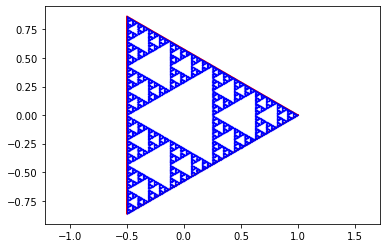

In [9]:
x= [k[0] for k in vpoints]
y= [i[1] for i in vpoints]
t1=[q[0] for q in p1list]
t2=[w[1] for w in p1list]

plt.axis("equal")
plt.plot(x,y,'r')
plt.plot(t1,t2,'b.',markersize=0.1)
plt.show()

Now we checked the plot is visual and functions are working correctly, we will now try different vertex numbers and fractions to see their characteristics in common.

|vertices(n)|Fraction `f`|
|:---|:--:|
|3    |0.25, 0.5, 0.75   |
|4    |0.25, 0.5, 0.75   |
|5    |0.25, 0.5, 0.75   |




### From here until plot are the codes to find various conditioned plots by using functions we created above

In [10]:
# n=3, f=0.25, loop 100,000times
p1list0=[]
for j in range(100000):
    r = pick_p1(p0,0.25,vpoints)
    p1list0.append(r)
    p0= r

In [11]:
# n=3, f=0.75, loop 100,000times
p1list2=[]
for j in range(100000):
    r = pick_p1(p0,0.75,vpoints)
    p1list2.append(r)
    p0= r

In [12]:
# Triangle boundary
x= [k[0] for k in vpoints]
y= [i[1] for i in vpoints]

In [13]:
# reset vertice list
vpoints=[]

In [14]:
# start n=4
vertices(4)

[[1.0, 0.0],
 [6.123233995736766e-17, 1.0],
 [-1.0, 1.2246467991473532e-16],
 [-1.8369701987210297e-16, -1.0],
 [1.0, 0.0]]

In [15]:
pick_p0(vpoints)

(-0.00116587143806135, -0.49706634930770766)

In [16]:
# n=4, f=0.25, loop 100,000times
p1list3=[]
for j in range(100000):
    r = pick_p1(p0,0.25,vpoints)
    if j>1000:
        p1list3.append(r)
    p0= r

In [17]:
# n=4, f=0.5, loop 100,000times
p1list4=[]
for j in range(100000):
    r = pick_p1(p0,0.5,vpoints)
    if j >1000:
        p1list4.append(r)
    p0= r

In [18]:
# n=4, f=0.75, loop 100,000times
p1list5=[]
for j in range(100000):
    r = pick_p1(p0,0.75,vpoints)
    p1list5.append(r)
    p0= r

In [19]:
# square boundary
a= [m[0] for m in vpoints]
b= [n[1] for n in vpoints]

In [20]:
# reset vertice list
vpoints=[]

In [21]:
# start n=5
vertices(5)

[[1.0, 0.0],
 [0.30901699437494745, 0.9510565162951535],
 [-0.8090169943749473, 0.5877852522924732],
 [-0.8090169943749475, -0.587785252292473],
 [0.30901699437494723, -0.9510565162951536],
 [1.0, 0.0]]

In [22]:
pick_p0(vpoints)

(0.23731318173032712, -0.043026530567655596)

In [23]:
# n=5, f=0.25, loop 100,000times
p1list6=[]
for j in range(100000):
    r = pick_p1(p0,0.25,vpoints)
    p1list6.append(r)
    p0= r

In [24]:
# n=5, f=0.5, loop 100,000times
p1list7=[]
for j in range(100000):
    r = pick_p1(p0,0.5,vpoints)
    p1list7.append(r)
    p0= r

In [25]:
# n=5, f=0.75, loop 100,000times
p1list8=[]
for j in range(100000):
    r = pick_p1(p0,0.75,vpoints)
    p1list8.append(r)
    p0= r

In [26]:
# pentagon boundary
s= [k[0] for k in vpoints]
d= [i[1] for i in vpoints]

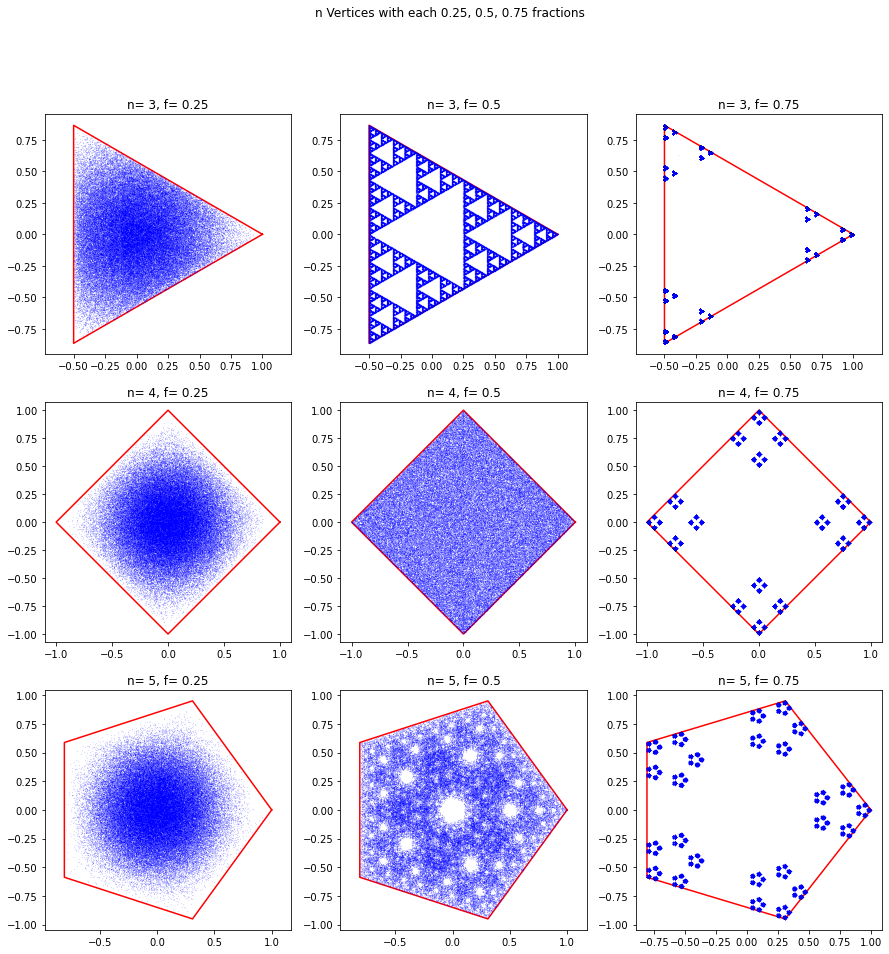

In [27]:
# p1 coordinates for n=3, f=0.25, 0.5, 0.75
t1=[q[0] for q in p1list]
t2=[w[1] for w in p1list]
t3=[e[0] for e in p1list0]
t4=[r[1] for r in p1list0]
t5=[t[0] for t in p1list2]
t6=[u[1] for u in p1list2]

# p1 coordinates for n=4, f=0.25, 0.5, 0.75
s1=[s11[0] for s11 in p1list3]
s2=[s22[1] for s22 in p1list3]
s3=[s33[0] for s33 in p1list4]
s4=[s44[1] for s44 in p1list4]
s5=[s55[0] for s55 in p1list5]
s6=[s66[1] for s66 in p1list5]

# p1 coordinates for n=5, f=0.25, 0.5, 0.75
p1=[p11[0] for p11 in p1list6]
p2=[p22[1] for p22 in p1list6]
p3=[p33[0] for p33 in p1list7]
p4=[p44[1] for p44 in p1list7]
p5=[p55[0] for p55 in p1list8]
p6=[p66[1] for p66 in p1list8]

plt.figure(figsize=(15,15))

# n=3, f=0.25
plt.axis("equal")
plt.subplot(3,3,1)
plt.plot(x,y,'r')
plt.plot(t3,t4,'b.',markersize=0.1)
plt.title('n= 3, f= 0.25')

# n=3, f=0.5
plt.axis("equal")
plt.subplot(3,3,2)
plt.plot(x,y,'r')
plt.plot(t1,t2,'b.',markersize=0.1)
plt.title('n= 3, f= 0.5')

# n=3, f=0.75
plt.axis("equal")
plt.subplot(3,3,3)
plt.plot(x,y,'r')
plt.plot(t5,t6,'b.',markersize=0.1)
plt.title('n= 3, f= 0.75')


# n=4, f=0.25
plt.axis("equal")
plt.subplot(3,3,4)
plt.plot(a,b,'r')
plt.plot(s1,s2,'b.',markersize=0.1)
plt.title('n= 4, f= 0.25')

# n=4, f=0.5
plt.axis("equal")
plt.subplot(3,3,5)
plt.plot(a,b,'r')
plt.plot(s3,s4,'b.',markersize=0.1)
plt.title('n= 4, f= 0.5')

# n=4, f=0.75
plt.axis("equal")
plt.subplot(3,3,6)
plt.plot(a,b,'r')
plt.plot(s5,s6,'b.',markersize=0.1)
plt.title('n= 4, f= 0.75')


# n=5, f=0.25
plt.axis("equal")
plt.subplot(3,3,7)
plt.plot(s,d,'r')
plt.plot(p1,p2,'b.',markersize=0.1)
plt.title('n= 5, f= 0.25')

# n=5, f=0.5
plt.axis("equal")
plt.subplot(3,3,8)
plt.plot(s,d,'r')
plt.plot(p3,p4,'b.',markersize=0.1)
plt.title('n= 5, f= 0.5')

# n=5, f=0.75
plt.axis("equal")
plt.subplot(3,3,9)
plt.plot(s,d,'r')
plt.plot(p5,p6,'b.',markersize=0.1)
plt.title('n= 5, f= 0.75')


plt.suptitle('n Vertices with each 0.25, 0.5, 0.75 fractions')
plt.show()

Finally, we have the plots.

As we see the plots above, there are few characteristics in common by either same vertices or fractions.



__There is no similar characteristic for each plot when only considered the number of vertices.__



__When the fractions are equal, it turn out to show similar popularity of points__. 

If the fraction is 0.25, points are likely to gather toward center and scattered as moving out of center. 

If the fraction is 0.5, vertices of 3 and 5 seems to create another triangles and pentagons from each vertices and stretch out toward origin. vertices of 4 is unlikely to follow the pattern. 

If the fraction is 0.75, All three different vertices plot have common pattern which is creating tiny polygons of that shape toward each vertex.



## Conclusion

We have studied basic algorithm to explore the world where the computations can not be done by hand.

Through out the project, we created 3 major functions which are `vertices(n)` that return equally distributed vertx coordinates list, `pick_p0(v)` that return point p0, and `pick_p1(p0,f,v)` that return point p1 .

We select the number of vertices -> pick `p0` random points inside the boundary -> find `p1` by moving fraction from p0 to random vertex.

After we built our algorithm, we ran 100,000 times each by 3 different vertices and 3 different fractions.

From the plot result, We were able to find certain characteristics in common.

There were no patterns found when the number of vertices are changed. However, patterns were likely to exist when the fractions are equal despite the number of vertices.